In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 7]

In [2]:
def map_to_car_space(v_x, v_y, v_theta, mp_x, mp_y):
    x = mp_x -v_x
    y = mp_y - v_y
    v_theta = -v_theta
    cs_x = x * math.cos(v_theta) - y * math.sin(v_theta) 
    cs_y = x * math.sin(v_theta) + y * math.cos(v_theta)
    return [cs_x,cs_y]

In [3]:
ptsx=np.array([-32.16173,-43.49173,-61.09,-78.29172,-93.05002,-107.7717])
ptsy=np.array([113.361,105.941,92.88499,78.73102,65.34102,50.57938])

In [4]:
with open ('../lake_track_waypoints.csv') as f:
    map_df = pd.read_table(f, sep=',', header=0, names=['x','y'], lineterminator='\n')

In [5]:
x = -40.62
y = 108.73
psi = 3.733651
v = 0

upsi=(psi-math.pi*2) % (2 * math.pi)
upsi=psi

dx=math.cos(upsi)*10
dy=math.sin(upsi)*10
print(psi,upsi)

3.733651 3.733651


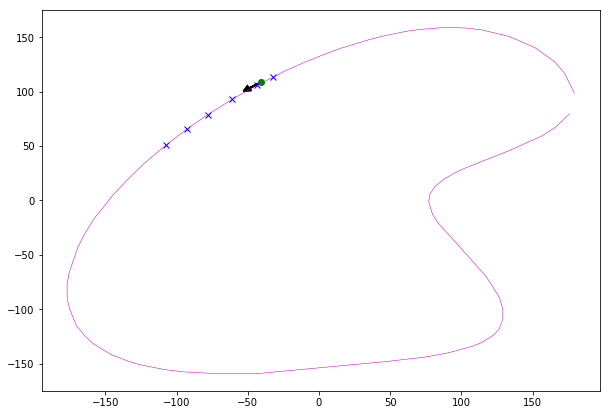

In [6]:
# plot waypoints and vehicle direction in map space
plt.figure()
plt.plot(ptsx,ptsy,'bx')
plt.arrow(x,y,dx,dy,fc="k", ec="k",linewidth=2,head_width=5, head_length=5)
plt.plot(x,y,'go')
plt.plot(map_df.x,map_df.y,linewidth=.5,color='m')

In [7]:
wpts=np.dstack((ptsx,ptsy))[0]

In [8]:
wcs=[map_to_car_space(x,y,psi,pt[0],pt[1]) for pt in wpts.tolist() ]

In [9]:
wcsx=[pt[0] for pt in wcs]
wcsy=[pt[1] for pt in wcs]

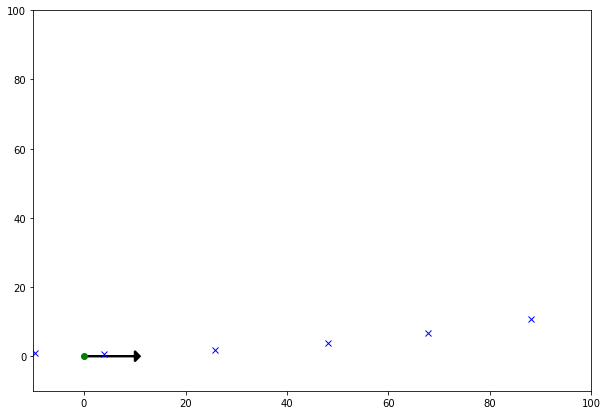

In [15]:
plt.figure()

plt.xlim(-10,100)
plt.ylim(-10,100)
plt.plot(wcsx,wcsy,'bx')
plt.arrow(0,0,10,0,fc="k", ec="k",linewidth=2,head_width=3, head_length=1)
plt.plot(0,0,'go')